In [2]:
import torch
ssh-rsa DocVQA

In [7]:
import transformers 
import os 
import json
from transformers import T5Tokenizer, T5Model

In [5]:
import numpy as np
data = np.load('/home/jsamper/Desktop/DocVQA/Data/imdb/imdb_val.npy', allow_pickle = True)
print(data[0])

{'creation_time': 1637157854.987034, 'version': 1.0, 'dataset_type': 'val', 'has_answer': True}


In [ ]:
def build_dataset(config, split):

    # Specify special params for data processing depending on the model used.
    dataset_kwargs = {}

    if config['model_name'].lower() in ['layoutlmv2', 'layoutlmv3', 'lt5', 'vt5', 'hilt5', 'hi-lt5', 'hivt5', 'hi-vt5']:
        dataset_kwargs['get_raw_ocr_data'] = True

    if config['model_name'].lower() in ['layoutlmv2', 'layoutlmv3', 'vt5', 'hivt5', 'hi-vt5']:
        dataset_kwargs['use_images'] = True

    if config['model_name'].lower() in ['hilt5', 'hi-lt5', 'hivt5', 'hi-vt5']:
        dataset_kwargs['max_pages'] = config.get('max_pages', 1)
        dataset_kwargs['hierarchical_method'] = True

    # Build dataset
    if config['dataset_name'] == 'SP-DocVQA':
        from datasets.SP_DocVQA import SPDocVQA
        dataset = SPDocVQA(config['imdb_dir'], config['images_dir'], split, dataset_kwargs)

    elif config['dataset_name'] == 'MP-DocVQA':
        from datasets.MP_DocVQA import MPDocVQA
        dataset = MPDocVQA(config['imdb_dir'], config['images_dir'], config['page_retrieval'], split, dataset_kwargs)

    elif config['dataset_name'] == 'DUDE':
        from datasets.DUDE import DUDE
        dataset = DUDE(config['imdb_dir'], config['images_dir'], config['page_retrieval'], split, dataset_kwargs)

    else:
        raise ValueError

    return dataset


In [6]:
print(data[1])

{'question': 'What is the ‘actual’ value per 1000, during the year 1975?', 'image_id': 'pybv0228_81', 'image_classes': [], 'extra_info': {'docId': 14465, 'ucsf_document_id': 'pybv0228', 'ucsf_document_page_no': '81'}, 'image_width': 2257, 'image_height': 1764, 'question_tokens': ['What', 'is', 'the', '‘actual’', 'value', 'per', '1000,', 'during', 'the', 'year', '1975'], 'question_id': 49153, 'set_name': 'val', 'image_name': 'pybv0228_81', 'image_path': 'documents/pybv0228_81.png', 'feature_path': 'pybv0228_81.npy', 'ocr_tokens': ['figure', 'c.', '2.', 'age', 'adjusted', 'motor', 'vehicle', 'accident', 'mortality', 'rate', '0.3', 'canada', '8.28', '8.26', '8.24', '8.22', '0.2', '1958', '1955', '1968', '1965', '1978', '1975', '1980', 'd.', 'actual', 'multivariate', 'predictor'], 'ocr_info': [{'word': 'figure', 'bounding_box': {'topLeftX': 0.47939743021710235, 'topLeftY': 0.12811791383219956, 'width': 0.056269384138236594, 'height': 0.01984126984126984}}, {'word': 'c.', 'bounding_box': {'

In [37]:
import numpy as np
import json
data_open = open('/home/jsamper/Desktop/DocVQA/Data/OCR/ffbf0023_4.json')
data = json.load(data_open)
d = [txt['words'] for txt in data['recognitionResults'][0]['lines']]
for bb in d:
    for b in bb:
        print(b['boundingBox'])
        print(b['text'])
#d1 = print([bb for bb in d[0]])
print(len([txt['words'] for txt in data['recognitionResults'][0]['lines']]))#

[622, 138, 655, 139, 656, 168, 624, 167]
R.
[661, 139, 685, 140, 687, 168, 662, 168]
J.
[691, 140, 847, 141, 849, 168, 692, 168]
REYNOLDS
[855, 141, 988, 140, 991, 167, 857, 168]
TOBACCO
[998, 140, 1135, 137, 1138, 165, 1000, 167]
COMPANY
[539, 171, 643, 174, 645, 203, 541, 202]
RETAIL
[649, 174, 801, 175, 803, 203, 651, 203]
PARTNERS
[808, 175, 974, 174, 977, 203, 810, 203]
MARKETING
[980, 174, 1053, 173, 1056, 203, 983, 203]
PLAN
[1062, 173, 1214, 169, 1217, 201, 1064, 203]
CONTRACT
[600, 205, 801, 206, 802, 235, 600, 233]
SELF-SERVICE
[808, 206, 885, 206, 886, 235, 809, 235]
PACK
[894, 206, 1004, 206, 1005, 235, 895, 235]
OUTLET
[1009, 206, 1020, 205, 1022, 235, 1011, 235]
-
[1026, 205, 1114, 204, 1116, 234, 1028, 235]
LEVEL
[1121, 204, 1154, 204, 1156, 233, 1123, 234]
1/2
[144, 256, 234, 256, 234, 282, 144, 281]
Request
[239, 256, 278, 257, 277, 282, 239, 282]
For
[283, 257, 376, 257, 376, 282, 282, 282]
Taxpayer
[381, 257, 520, 256, 519, 282, 381, 282]
Identification
[525, 256, 61

In [1]:
from transformers import T5Tokenizer, T5Model

tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5Model.from_pretrained('t5-small')

#input_ids = tokenizer.encode("Hello, my dog is cute", return_tensors="pt")  # Batch size 1
#outputs = model(input_ids=input_ids, decoder_input_ids=input_ids)

#print(outputs)
#last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

/home/jsamper/anaconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|███████████████| 2.32k/2.32k [00:00<00:00, 8.10MB/s]
spiece.model: 100%|██████████████████████████| 792k/792k [00:00<00:00, 3.88MB/s]
tokenizer.json: 100%|██████████████████████| 1.39M/1.39M [00:00<00:00, 3.42MB/s]
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been a

Seq2SeqModelOutput(last_hidden_state=tensor([[[ 1.4369e-01,  1.4386e-01, -4.7941e-03,  ..., -2.3173e-02,
           1.0858e-04,  1.6127e-01],
         [ 1.1931e-01,  3.9220e-02,  1.6290e-02,  ..., -7.3952e-02,
           1.6589e-04,  2.1462e-01],
         [ 1.8631e-01,  9.6948e-02, -5.1552e-02,  ..., -2.0244e-01,
           2.4398e-04, -4.0386e-01],
         ...,
         [-1.0248e-01,  1.7281e-01, -9.0571e-02,  ..., -1.0922e-01,
           1.9918e-04, -9.8183e-02],
         [ 4.9895e-02,  3.9932e-01, -7.3522e-02,  ..., -4.2682e-02,
          -1.4140e-04, -1.9235e-02],
         [ 9.0911e-02,  3.1306e-01, -2.9686e-02,  ..., -4.4650e-02,
           3.7607e-04,  4.6961e-02]]], grad_fn=<MulBackward0>), past_key_values=((tensor([[[[ 1.3086, -2.2850,  0.3036,  ..., -0.3624,  1.9348, -0.5166],
          [ 0.3645,  2.2658, -0.6080,  ..., -0.2479, -0.1147, -0.1983],
          [ 0.1388, -1.6923,  0.7861,  ..., -0.9187,  1.9204,  0.9174],
          ...,
          [ 2.2785, -0.2475,  0.5488,  ...,

In [16]:
import json
question_path = '/home/jsamper/Desktop/DocVQA/Data/Annotations/train_v1.0_withQT.json'
# Opening JSON file
quest = open(question_path)
 
# returns JSON object as 
# a dictionary
question = json.load(quest)
for data in question['data']:
    print(data)
 
#print(question['data'][0])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{'questionId': 51960, 'question': 'what is the approved grand total amount for the year 1976 ?', 'question_types': ['table/list'], 'image': 'documents/skph0227_5.png', 'docId': 1616, 'ucsf_document_id': 'skph0227', 'ucsf_document_page_no': '5', 'answers': ['$86,336', '$ 86,336'], 'data_split': 'train'}
{'questionId': 51961, 'question': 'What is the document title?', 'question_types': ['layout'], 'image': 'documents/gtfl0228_1.png', 'docId': 1828, 'ucsf_document_id': 'gtfl0228', 'ucsf_document_page_no': '1', 'answers': ['2000 Inventory of Industry Voluntary Actions', '2000 Inventory Of Industry Voluntary Actions'], 'data_split': 'train'}
{'questionId': 51962, 'question': 'what is the approved amount for season-long weed control (wicks) in the year 1975 ?', 'question_types': ['table/list'], 'image': 'documents/skph0227_5.png', 'docId': 1616, 'ucsf_document_id': 'skph0227', 'ucsf_document_page_no': '5', 'answers': ['$ 4,800'], 'data_split': 'train'}
{'questionId': 51963, 'question': 'wha

In [47]:
t = 'hola bon dia'
t.find('ia')

10

In [43]:
# List of words
word_list = ["This", "is", "a", "list", "of", "words"]

# Convert the list of words into a single sentence
sentence = " ".join(word_list)

# Print the result
print(sentence)

This is a list of words


In [ ]:
import random
class SP_VQADataset(Dataset):
    def __init__(self, annotations_dir, ocr_dir, images_dir, transform=None):
        # Initialize the ColorizationDataset class with the specified root directory and transformation
        self.annotations_dir = annotations_dir
        self.ocr_dir = ocr_dir
        self.images_dir
        #self.transform = transform
        # Get a list of image files in the root directory
        self.ocr_files = [f for f in os.listdir(ocr_dir) if os.path.isfile(os.path.join(ocr_dir, f))]
        self.image_files = [f for f in os.listdir(images_dir) if os.path.isfile(os.path.join(images_dir, f))]
    
    
    def __len__(self):
        # Return the length of the dataset (number of image files)
        with open(self.annotations_dir) as annotations:
            return len(annotations['data'])

    def __getitem__(self, idx):
        # Get the image at the specified index
        with open(self.annotations_dir) as annotations:
            annotations_data = annotations['data'][idx]
            
            image_name = data['image'][10:]
            image_path = os.path.join(self.images_dir, image_name)
            image = Image.open(image_path).convert('RGB')
            
            ocr_name = data['ucsf_document_id']
            ocr_path = os.path.join(self.ocr_dir, ocr_name)
            ocr_route = open(ocr_path)
            ocr = json.load(ocr_route)
             
            
            ocr_list = ocr['recognitionResults']['lines']
            # Open the image using PIL
            

            # Apply the specified transformation to the image
            #image = self.transform(image)
            # Transpose the image tensor
            #image = torch.transpose(image, dim0=0, dim1=2)
    

        return question, ocr_char, ocr_pos, image, answer
    def process_ocr(self, ocr):
        context = [txt['text'] for txt in ocr['recognitionResults'][0]['lines']]#get all the text in the image by sentences recognized by the OCR
        context_bbox = []
        context_txt = []
        for data in ocr:
            for d in data:
                context_bbox.append(d['boundingBox'])#get all the bounding boxes of the text in the image by words 
                context_txt.append(d['text'])#get all the text in the image by words 
                return context,context_bbox,context_txt

    def get_questions(self, annotations_data):
        question = annotations_data['question']
        questionId = annotations_data['questionId']
        return question, questionId
    
    def get_start_end_answer_idx(self, context, annotations_data):
        answers = annotations_data['answers']
        context_joined = "".join(context)
        answer_positions = []
        for answer in answers:
            start_idx = context_joined.find(answer)

            if start_idx != -1:
                end_idx = start_idx + len(answer)
                answer_positions.append([start_idx, end_idx])

        if len(answer_positions) > 0:
            start_idx, end_idx = random.choice(answer_positions)  # If both answers are in the context. Choose one randomly.
            answer = context_joined[start_idx: end_idx]
        else:
            start_idx, end_idx = 0, 0  # If the indices are out of the sequence length they are ignored. Therefore, we set them as a very big number.

        return answer, start_idx, end_idx
    
    '''def get_answers(self, annotations_data, context):
        answers = annotations_data['answers']
        random_idx = random.randrange(0, len(answers))
        #answer = answers[random_idx]
        
        pos_idx = []
        context_page_token_correspondent = []
        for batch_idx in range(len(context)):
            batch_pos_idxs = []
            for answer in answers:
                start_idxs = [m.start() for m in re.finditer(re.escape(answer), context[batch_idx])]

                for start_idx in start_idxs:
                    end_idx = start_idx + len(answer)
                    #start_idx, end_idx = correct_alignment(context[batch_idx], answer, start_idx, end_idx)

                    if start_idx is not None and end_idx != 0:
                        batch_pos_idxs.append([start_idx, end_idx])
                        break
            if len(batch_pos_idxs) == 0:
            # Answer not in context
            pos_idx.append([ignore_id, ignore_id])
            
            else:
            # Select one of the possible correct answers
            start_idx, end_idx = random.choice(batch_pos_idxs)

            start_positions_context = context_encoding[batch_idx].char_to_token(start_idx)
            end_positions_context = context_encoding[batch_idx].char_to_token(end_idx - 1)
            
            
        random_idx = random.randrange(0, len(batch_pos_idx))
        idxs = batch_pos_idxs[random_idx]
        answer_strt_idx = idxs[0]
        answer_end_idx = idxs[1]
        
        
        return answer, answer_strt_idx, answer_end_idx'''
    

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from transformers import T5Config
from transformers import AutoFeatureExtractor, AutoModel
from torch.nn import CrossEntropyLoss
from torch.nn import LayerNorm as BertLayerNorm


class CustomT5Config(T5Config):
    def __init__(self, max_2d_position_embeddings=1024,  **kwargs):
        super().__init__(**kwargs)
        self.max_2d_position_embeddings = max_2d_position_embeddings
        self.hidden_dropout_prob = 0.1
        self.layer_norm_eps = 1e-12


class SpatialEmbeddings(nn.Module):
    """
    Spatial embedding by summing x, y, w, h projected by nn.Embedding to hidden size.
    """

    def __init__(self):#, config
        super(SpatialEmbeddings, self).__init__()

        self.x_position_embeddings = nn.Embedding(
            1000, 512#config.max_2d_position_embeddings, config.hidden_size
        )
        self.y_position_embeddings = nn.Embedding(
            1000, 512#config.max_2d_position_embeddings, config.hidden_size
        )
        # self.h_position_embeddings = nn.Embedding(
        #     config.max_2d_position_embeddings, config.hidden_size
        # )
        # self.w_position_embeddings = nn.Embedding(
        #     config.max_2d_position_embeddings, config.hidden_size
        # )

        self.LayerNorm = BertLayerNorm(512, eps=config.layer_norm_eps)#config.hidden_size
        self.dropout = nn.Dropout(0.1)#config.hidden_dropout_prob

        self.spatial_emb_matcher = MLP(512, 0, 512, 1)#config.hidden_size,config.hidden_size

        #self.config = config

    def forward(self, bbox):
        left_position_embeddings = self.x_position_embeddings(bbox[:, :, 0])
        upper_position_embeddings = self.y_position_embeddings(bbox[:, :, 1])
        right_position_embeddings = self.x_position_embeddings(bbox[:, :, 2])
        lower_position_embeddings = self.y_position_embeddings(bbox[:, :, 3])

        # h_position_embeddings = self.h_position_embeddings(bbox[:, :, 3] - bbox[:, :, 1])  # TODO Remove width and height to test how much important are they.
        # w_position_embeddings = self.w_position_embeddings(bbox[:, :, 2] - bbox[:, :, 0])  # TODO Remove width and height to test how much important are they.

        embeddings = (
                left_position_embeddings
                + upper_position_embeddings
                + right_position_embeddings
                + lower_position_embeddings
                # + h_position_embeddings
                # + w_position_embeddings
        )

        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        embeddings = self.spatial_emb_matcher(embeddings)
        return embeddings


class MLP(nn.Module):
    """ Very simple multi-layer perceptron (also called FFN)"""

    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super().__init__()
        self.num_layers = num_layers
        h = [hidden_dim] * (num_layers - 1)
        self.layers = nn.ModuleList(nn.Linear(n, k) for n, k in zip([input_dim] + h, h + [output_dim]))

    def forward(self, x):
        for i, layer in enumerate(self.layers):
            x = F.relu(layer(x)) if i < self.num_layers - 1 else layer(x)
        return x


class VisualEmbeddings(nn.Module):

    def __init__(self):#, config
        super(VisualEmbeddings, self).__init__()
        model_link = 'microsoft/dit-base-finetuned-rvlcdip'
        self.feature_extractor = AutoFeatureExtractor.from_pretrained(model_link)
        self.image_model = AutoModel.from_pretrained(model_link)
        self.visual_emb_matcher = MLP(self.image_model.config.hidden_size, 0, self.image_model.config.hidden_size, 1)

        '''if not config.visual_module_config.get('finetune', False):
            self.freeze()'''

    def freeze(self):
        for p in self.image_model.parameters():
            p.requires_grad = False

    def get_visual_boxes(self, num_pages=1, scale=1):
        boxes = torch.tensor([[0, 0, 1, 1]] + [[x / 14, y / 14, (x + 1) / 14, (y + 1) / 14] for y in range(0, 14) for x in range(0, 14)], dtype=torch.float32)
        boxes = boxes.unsqueeze(dim=0).expand([num_pages, -1, -1])
        boxes = boxes * scale
        return boxes

    def forward(self, images, page_idx_mask=None):
        inputs = self.feature_extractor(images=images, return_tensors="pt")
        vis_embeddings = self.image_model(inputs.pixel_values.to(self.image_model.device))
        vis_embeddings = vis_embeddings.last_hidden_state  # BS; 14x14+CLS (197); 768 (hidden size)
        vis_embeddings = self.visual_emb_matcher(vis_embeddings)

        if page_idx_mask is not None:
            vis_attention_mask = torch.zeros(vis_embeddings.shape[:2], dtype=torch.long).to(self.image_model.device)
            vis_attention_mask[page_idx_mask] = 1
        else:
            vis_attention_mask = torch.ones(vis_embeddings.shape[:2], dtype=torch.long).to(self.image_model.device)

        return vis_embeddings, vis_attention_mask


class RetrievalModule(nn.Module):

    def __init__(self, config):
        super(RetrievalModule, self).__init__()

        self.page_retrieval = nn.Linear(config.max_doc_pages * config.page_tokens * config.hidden_size, config.max_doc_pages)
        # TODO Check if BinaryCrossEntropy allows to extend to longer sequences.

        if config.page_retrieval_config['loss'].lower() in ['ce', 'crossentropy', 'crossentropyloss']:
            self.retrieval_criterion = CrossEntropyLoss()

        self.retrieval_loss_weight = config.page_retrieval_config['loss_weight']

    def forward(self, document_embeddings, answer_page_idx):
        document_embeddings = document_embeddings.view([len(document_embeddings), -1])
        # document_embeddings = F.pad(document_embeddings, (0, self.page_retrieval.in_features-document_embeddings.shape[-1]), "constant", 0)  # In case is the last batch

        try:
            ret_logits = self.page_retrieval(document_embeddings)  # 10*2*512

        except:
            pad_document_embeddings = torch.zeros([len(document_embeddings), self.page_retrieval.in_features], dtype=document_embeddings.dtype, device=document_embeddings.device)
            pad_document_embeddings[:, :document_embeddings.shape[-1]] = document_embeddings
            ret_logits = self.page_retrieval(pad_document_embeddings.to())  # 10*2*512

        ret_loss = self.retrieval_criterion(ret_logits, answer_page_idx) * self.retrieval_loss_weight if answer_page_idx is not None else None

        return ret_loss, ret_logits

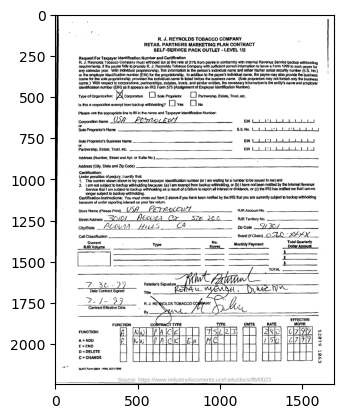

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
image_path = '/home/jsamper/Desktop/DocVQA/Data/Images/ffbf0023_4.png'
#image_path = os.path.join(self.images_dir, image_name)
image = Image.open(image_path).convert('RGB')
plt.imshow(image)

In [9]:
ve = VisualEmbeddings()
ve.forward(image)

preprocessor_config.json: 100%|█████████████████| 302/302 [00:00<00:00, 852kB/s]
/home/jsamper/anaconda3/envs/myenv/lib/python3.12/site-packages/transformers/models/beit/feature_extraction_beit.py:28: FutureWarning: The class BeitFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use BeitImageProcessor instead.
  warnings.warn(
/home/jsamper/anaconda3/envs/myenv/lib/python3.12/site-packages/transformers/models/beit/image_processing_beit.py:110: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(
config.json: 100%|█████████████████████████| 1.79k/1.79k [00:00<00:00, 4.34MB/s]
pytorch_model.bin: 100%|█████████████████████| 343M/343M [00:06<00:00, 57.0MB/s]


(tensor([[[-91.8676,  80.8922, -71.5578,  ..., -41.0896, -59.3503,  90.2056],
          [-23.0358,   9.1729, -38.7306,  ...,  13.4366,  13.7700,  39.0854],
          [-38.0256,  17.6749, -55.2190,  ...,  14.1052,  16.3718,  56.7645],
          ...,
          [-37.5292,  21.6634, -53.7713,  ...,  16.8624,  23.6674,  56.4420],
          [-35.6484,  17.7320, -48.3055,  ...,  18.3637,  23.5238,  53.1608],
          [-27.7498,   8.8926, -43.4407,  ...,  17.1147,  19.8236,  51.0645]]],
        grad_fn=<ViewBackward0>),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
def question_embedding(question):
    input_ids = tokenizer.encode(question, return_tensor = 'pt')
    outputs = model(input_ids = input_ids,decoder_input_ids =input_ids)
    return outputs[0]

In [ ]:
def OCR_embedding(ocr_text, ocr_box):
    input_ids = tokenizer.encode(ocr_text, return_tensor = 'pt')
    outputs = model(input_ids = input_ids,decoder_input_ids =input_ids)
    return outputs[0]

In [4]:
last_hidden_states = outputs[0] 
last_hidden_states.shape

torch.Size([1, 7, 512])

In [3]:
! install sentencepiece

DEPRECATION: Loading egg at /home/jsamper/anaconda3/envs/myenv/lib/python3.12/site-packages/sacremoses-0.0.43-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached sentencepiece-0.1.99.tar.gz (2.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [65 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-312
      creating build/lib.linux-x86_64-cpython-312/sentencepiece
      copying src/sentencepiece/__init__.py -> build/lib.linux-x86_64-cpython-312/sentencepiece
      copying src/sentencepiece/_version.py -> build/lib.linux-x86_64-cpython-312/sentencepiece
      copying src/sentencepiece/sentencepiece_model_pb2.

In [7]:
!sudo apt-get install cmake build-essential pkg-config libgoogle-perftools-dev

[sudo] password for jsamper: 
